In [1]:
import os
import pandas as pd

In [2]:
path = './Visualize' #path to the files

In [3]:
os.chdir(path)

In [4]:
df1 = pd.read_csv("Pollution.csv",)

### Pop quiz: Why do we not privide path to the file for df1 above?

In [5]:
#df1.describe()
df1.head()

,country,Village_id,Factories,Pollution
0,Greece,147,21,0.32
1,Greece,575,17,0.40
2,Greece,207,7,0.41
3,Greece,333,12,0.37
4,Greece,26,14,0.12


In [6]:
df = df1.copy() # making a copy

In [7]:
df.head()

,country,Village_id,Factories,Pollution
0,Greece,147,21,0.32
1,Greece,575,17,0.40
2,Greece,207,7,0.41
3,Greece,333,12,0.37
4,Greece,26,14,0.12


# Descriptive Statistics

In [8]:
df.mean()

Village_id    464.604027
Factories      18.396719
Pollution       0.420266
dtype: float64

In [9]:
df.groupby('country').mean() # for all vars

,Village_id,Factories,Pollution
country,,,
Bulgaria,395.695736,19.887597,0.452849
Greece,307.850095,16.833017,0.432410
Hungary,396.944895,19.058347,0.396029
Italy,388.401535,17.043478,0.336854
Poland,683.427785,17.023384,0.432366
Portugal,540.114710,17.859649,0.425439
Romania,414.343254,21.515873,0.443532


In [10]:
df.groupby('country').Pollution.mean() # for one var

country
Bulgaria    0.452849
Greece      0.432410
Hungary     0.396029
Italy       0.336854
Poland      0.432366
Portugal    0.425439
Romania     0.443532
Name: Pollution, dtype: float64

In [11]:
### df.groupby(["VarA", "VarB"]).word_count.mean() # for cross tabulation

In [12]:
df.groupby(["country"]).agg({'Factories':'count','Pollution': 'mean'})

,Factories,Pollution
country,,
Bulgaria,516,0.452849
Greece,527,0.432410
Hungary,617,0.396029
Italy,391,0.336854
Poland,727,0.432366
Portugal,741,0.425439
Romania,504,0.443532


In [13]:
df.groupby(["country"]).agg({'Factories':'count','Pollution': 'mean'}).unstack()#in one table 

           country 
Factories  Bulgaria    516.000000
           Greece      527.000000
           Hungary     617.000000
           Italy       391.000000
           Poland      727.000000
           Portugal    741.000000
           Romania     504.000000
Pollution  Bulgaria      0.452849
           Greece        0.432410
           Hungary       0.396029
           Italy         0.336854
           Poland        0.432366
           Portugal      0.425439
           Romania       0.443532
dtype: float64

In [14]:
(
 df
 .groupby(["country"])
 .agg({'Factories':'count',
       'Pollution': 'mean'})
)

,Factories,Pollution
country,,
Bulgaria,516,0.452849
Greece,527,0.432410
Hungary,617,0.396029
Italy,391,0.336854
Poland,727,0.432366
Portugal,741,0.425439
Romania,504,0.443532


In [15]:
(
 
 df
 .groupby(["country"])
 .agg({'Factories': ('count','mean','std','min','max','sum'),
       'Pollution': 'mean'})

)

Factories                                     Pollution
             count       mean       std min max    sum      mean
country                                                         
Bulgaria       516  19.887597  9.437735   3  33  10262  0.452849
Greece         527  16.833017  7.027554   3  31   8871  0.432410
Hungary        617  19.058347  6.644241   9  32  11759  0.396029
Italy          391  17.043478  9.647407   3  31   6664  0.336854
Poland         727  17.023384  7.605149   3  33  12376  0.432366
Portugal       741  17.859649  7.490842   3  32  13234  0.425439
Romania        504  21.515873  8.096814   3  33  10844  0.443532

#   VISUALIZATION

In [16]:
import matplotlib.pyplot as plt # matplotlib ------> https://matplotlib.org/

In [17]:
### for bar chart
Factory_count = df.groupby('country').Factories.count()

In [18]:
df3 = pd.DataFrame(Factory_count).reset_index()

<BarContainer object of 7 artists>

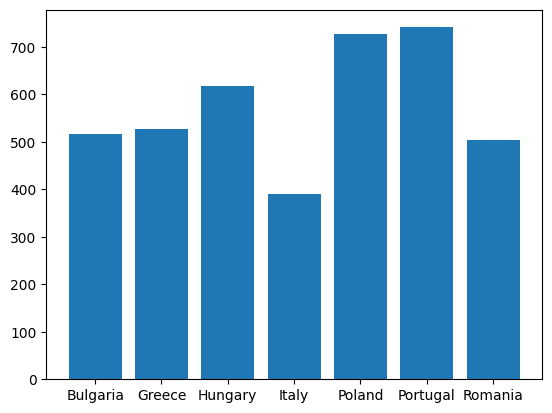

In [19]:
### plt.bar(x, y, width=1, edgecolor="white", linewidth=0.7, align = 'center')
plt.bar(df3['country'], df3['Factories'])

<BarContainer object of 7 artists>

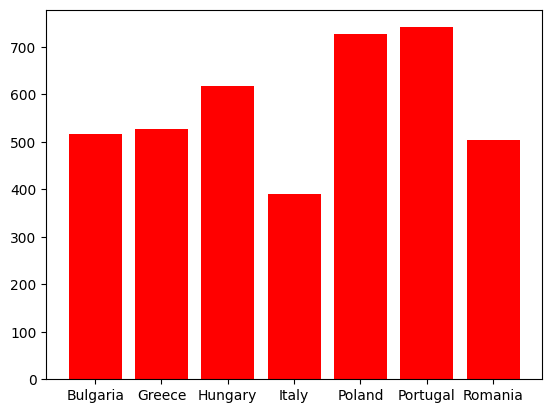

In [20]:
plt.bar(df3['country'], df3['Factories'], color='red')

<BarContainer object of 7 artists>

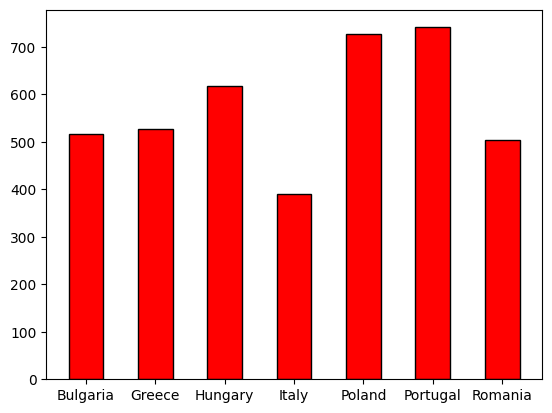

In [21]:
plt.bar(df3['country'], df3['Factories'], color='red', edgecolor="black", width = 0.5, align='center')

### Box plots

<AxesSubplot:title={'center':'Pollution'}, xlabel='country'>

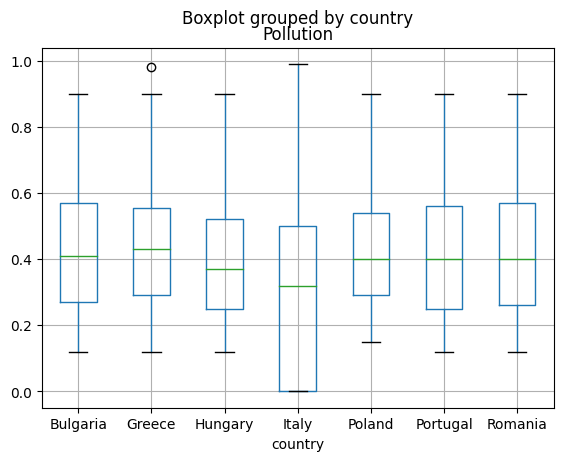

In [22]:
df.boxplot(by ='country',column =['Pollution'])

<AxesSubplot:title={'center':'Pollution'}, xlabel='country'>

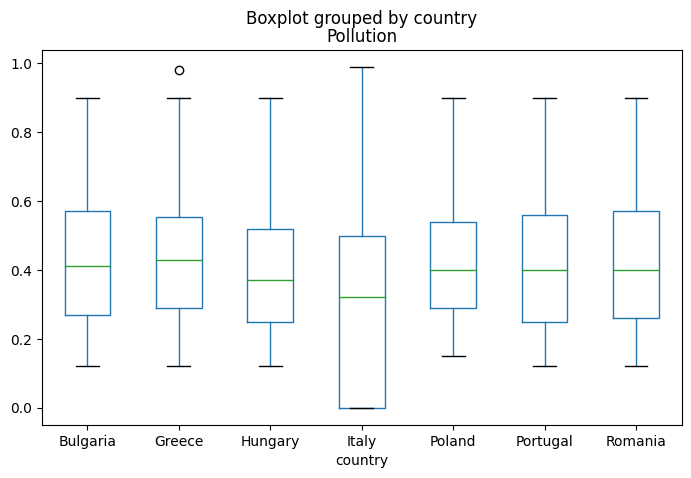

In [23]:
df.boxplot(by ='country', column =['Pollution'], figsize = (8,5), grid = False)

Text(0.5, 1.0, 'AAA BBB CCC DDD EEE')

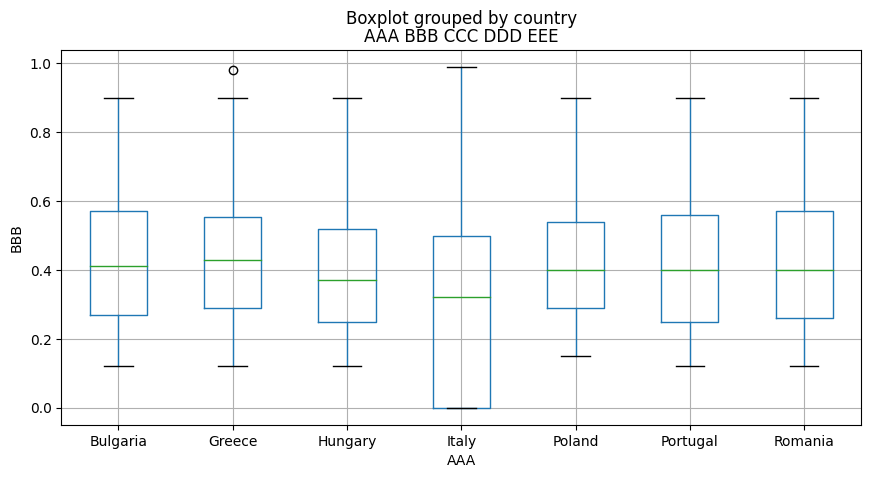

In [24]:
df.boxplot(by ='country',
           column =['Pollution'],
           figsize = (10,5),
            # grid = False,
            # vert =0,
            # showmeans=True,
            # meanline = True,
            # notch=True,
            # patch_artist=True,
            # rot=25,
            # color = "red"
                    )

plt.xlabel("AAA")
plt.ylabel("BBB")
plt.title("AAA BBB CCC DDD EEE")
#plt.show() # to show, use this
#plt.savefig("BoxPlotA.jpg") # to save, use this

### Plotly interactive graph (to be3 opened in browser)

In [25]:
!pip install plotly

  Obtaining dependency information for plotly from https://files.pythonhosted.org/packages/a8/07/72953cf70e3bd3a24cbc3e743e6f8539abe6e3e6d83c3c0c83426eaffd39/plotly-5.18.0-py3-none-any.whl.metadata
  Obtaining dependency information for tenacity>=6.2.0 from https://files.pythonhosted.org/packages/f4/f1/990741d5bb2487d529d20a433210ffa136a367751e454214013b441c4575/tenacity-8.2.3-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.6/15.6 MB 25.7 MB/s eta 0:00:0000:0100:01


In [26]:
# for plotly interactive graph
import plotly.graph_objs as go

In [27]:
from plotly.offline import plot #iplot for jupyter; plot for spyder
import plotly.express as px

In [28]:
df_countrycode = pd.read_csv("country_code.csv")

In [29]:
df_combined = pd.merge(df3, df_countrycode, on='country', how='left', validate="one_to_one")

In [30]:
fig = px.choropleth(df_combined,
        locations=df_combined['Alpha_3_code'], 
        color = df_combined['Factories'], 
        hover_name =df_combined['country'], 
        title='Number of factories')
plot(fig) # for spyder, shows in a separte browser; iplot for jupyter

'temp-plot.html'

In [31]:
### if the figure does not show in a browser online, try  jupyter or spyder in desktop

## Task: load "Students1.csv" from Preprocess folder and draw histogram of History and Maths subjects

In [35]:
os.getcwd() # gets the current working directory

In [34]:
# load the "Students1.csv" as df_grade
df_grade = pd.read_csv('----------------Students1.csv') # fill in the proper path to the file

In [ ]:
df_grade.head()

In [ ]:
import matplotlib.pyplot as plt # if not already imported

In [ ]:
plt.hist(df_grade['History'], label= 'History Score', 
         alpha=1, color = 'yellow',
         edgecolor='black', 
         bins=range(25, 95, 5)) #density=True, cumulative=True
  
# plotting second histogram
plt.hist(df_grade['Maths'], label= 'Math Score', 
         alpha=.3, color='blue',
         edgecolor='black',
         bins=range(25, 95, 5) )

# Showing the plot using plt.show()
plt.xlabel('Score', fontsize=10)
plt.xticks(range(25, 90, 5))
plt.ylabel('No. of students', fontsize=10)
plt.legend()
plt.show()

In [ ]:
#os.getcwd()

In [ ]:
#file_list

In [ ]:
#path = '/home/jovyan/Visualize' #path to the file

In [ ]:
#file_list = glob.glob(path+"/*.txt")

In [ ]:
#import glob

In [ ]:
#for file_path in file_list:
#    with open(file_path, encoding="utf8") as f_input:
#        corpus.append(f_input.read())

In [ ]:
#corpus

In [ ]:
#corpus = []

In [ ]:
#df.info()

In [ ]:
#df = pd.DataFrame(file_list, columns=['Filenames'])

In [ ]:
#df["Word_test"] = df["Content"].str.count("test")

In [ ]:
#df["Content"] = pd.DataFrame(corpus)

In [ ]:
#df

In [ ]:
#df["Name"] = df["Filenames"].str[-6:]

In [ ]:
#df["Name"] = df["Name"].str.replace(".txt","", regex=True)

In [ ]:
#df["Year"] = df["Name"].str[1:].astype(int)

In [ ]:
#df["Name"] = df["Name"].str[0]

In [ ]:
#df_summary

In [ ]:
#df_summary  = (   df
#     .groupby(["Name"])
#     .agg({'Year': ('min','max','count'),
#           'Word_test': 'mean',
#            'Word_is': 'mean' })
#             )

In [ ]:
#df["Word_is"] = df["Content"].str.count("is")

In [ ]:
#import matplotlib.pyplot as plt
#mport seaborn as sns

In [ ]:
#!pip install seaborn

In [ ]:
#import seaborn as sns

In [ ]:
#sns.set(style="whitegrid")
#ax = sns.lineplot(x='Year', y='Word_is', hue="Name", data=df)  
#ax.set(xlabel='aaaabbbbccc',
#       ylabel='dddeeefff',
#       title='ggghhhiiijjjkkklll')
#plt.legend(loc='upper left',fontsize='15')
#plt.show()